In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv('Data/training_mush.csv')
df.head()


,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [6]:
df.info()
X = df.drop('class', axis=1)
y = df['class']
X.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6093 entries, 0 to 6092
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   cap-shape                 6093 non-null   int64
 1   cap-surface               6093 non-null   int64
 2   cap-color                 6093 non-null   int64
 3   bruises                   6093 non-null   int64
 4   odor                      6093 non-null   int64
 5   gill-attachment           6093 non-null   int64
 6   gill-spacing              6093 non-null   int64
 7   gill-size                 6093 non-null   int64
 8   gill-color                6093 non-null   int64
 9   stalk-shape               6093 non-null   int64
 10  stalk-root                6093 non-null   int64
 11  stalk-surface-above-ring  6093 non-null   int64
 12  stalk-surface-below-ring  6093 non-null   int64
 13  stalk-color-above-ring    6093 non-null   int64
 14  stalk-color-below-ring    6093 non-null 

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,2,0,3,1,5,1,0,0,9,1,...,2,3,7,0,2,1,4,3,5,0
1,2,0,4,0,5,1,0,1,10,0,...,3,7,4,0,2,1,0,7,4,0
2,2,0,3,0,2,1,0,0,7,0,...,1,0,4,0,2,1,2,1,5,1
3,0,0,3,0,5,1,1,0,2,0,...,2,7,7,0,2,2,4,7,3,1
4,2,3,3,1,5,1,0,0,10,1,...,2,3,6,0,2,1,4,2,5,0


Создаем экземпляр леса, выбираем фичи для исследования и через грид серч подбираем параметры фичей, далее выводим через бест парамс

In [9]:
np.random.seed(0)
RF_clf = RandomForestClassifier(random_state=0)
parameters = {'n_estimators': range(10, 50, 10),
              'max_depth': range(1, 12, 2),
              'min_samples_split': range(2, 9, 2),
              'min_samples_leaf': range(1, 7)}
grid_search_cv_clf = GridSearchCV(RF_clf, parameters, cv=3,  n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

Обучаем модель с лучшими параметрами, и строим график важности фичей

<AxesSubplot:>

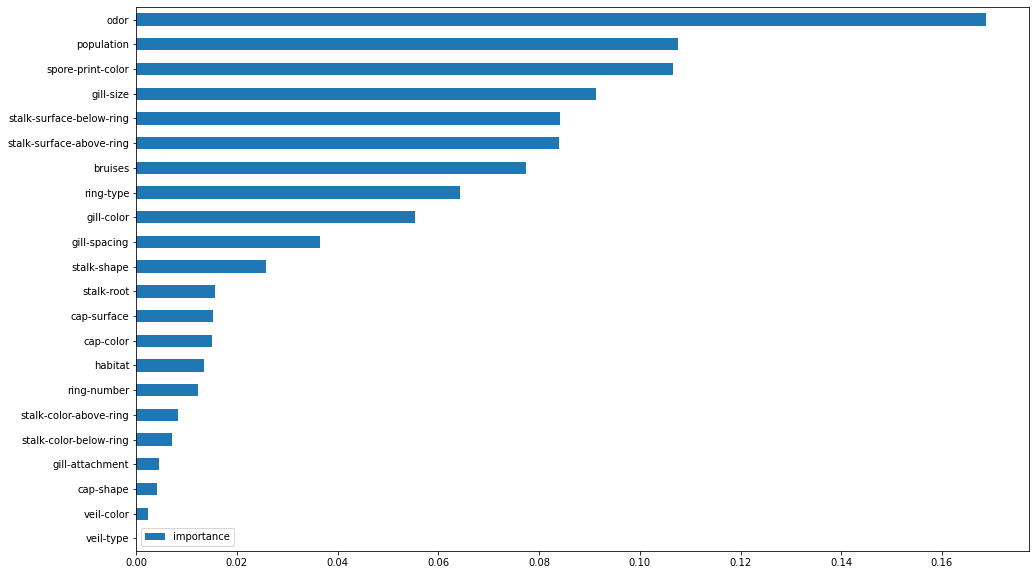

In [14]:
RF_clf = RandomForestClassifier(**grid_search_cv_clf.best_params_).fit(X, y)
imp = pd.DataFrame(RF_clf.feature_importances_, index=X.columns, columns=['importance']) # Создаем датафрейм с фичами и распределяем их по степени важности
imp.sort_values('importance').plot(kind='barh', figsize=(16, 10)) # отрисовываем фичи в порядке убывания

In [30]:
X_test = pd.read_csv('Data/testing_mush.csv')
X_test.head()
y_pred_counts = pd.Series(RF_clf.predict(X_test)).value_counts() # Подсчет количества съедобный и не съедобных грибов
y_pred_counts

0    1055
1     976
dtype: int64

Показываем наксолько точно работает модель

In [28]:
y_pred = pd.Series(RF_clf.predict(X_test))
y_true = pd.read_csv('Data/testing_y_mush.csv')

<AxesSubplot:>

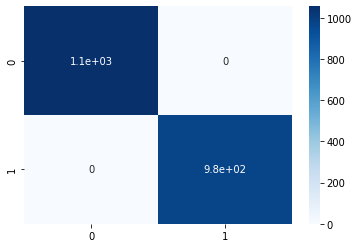

In [29]:
sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, cmap="Blues") # графически отображаем точность предсказания

In [31]:
confusion_matrix(y_true, y_pred)

array([[1055,    0],
       [   0,  976]], dtype=int64)